# Visualizations

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pycountry

We will try to create some heatmap visualizations on world map to represent our findings.

In [2]:
df = pd.read_csv("../LLM_generated/indexLLM.csv")

def standardizeCountryName(name):
    try:
        return pycountry.countries.lookup(name).name
    except LookupError:
        return name
df["Country"] = df["Country"].replace({"TURKEY": "Turkey"})
df["Country"] = df["Country"].replace({"KOSOVO": "Kosovo"})
df["Country"] = df["Country"].replace({"PALESTINE": "Palestine (West Bank and Gaza)"})
df["Country"] = df["Country"].replace({"RUSSIA": "RUSSIAN FEDERATION"})
df["Country"] = df["Country"].apply(standardizeCountryName)
df.head()

,Country,University,CollegeRank,Tuition,PercOfIntStud,AcceptanceRate,SafetyIndex,Link,Computer Science,Business,...,Latitude,Longitude,Ranking,region,RecreationIndex,HealthcareIndex,TransportIndex,LivingCostIndex,RentIndex,GroceriesIndex
0,Albania,University of Tirana,1001+,1500,5,60,70,https://unitir.edu.al,1,1,...,41.3275,19.8189,2001.0,Europe,25.0,12.5,33.3,30.0,20.8,42.9
1,Algeria,University of Algiers,1001+,800,2,50,65,http://www.univ-alger.dz,1,1,...,36.7529,3.0420,2001.0,Africa,30.0,15.0,44.4,27.5,16.7,34.3
2,Argentina,University of Buenos Aires,131,0,8,65,70,https://www.uba.ar,1,1,...,-34.5997,-58.3721,2001.0,Southern America,50.0,25.0,33.3,30.0,20.8,42.9
3,Armenia,Yerevan State University,1001+,2000,6,40,70,https://www.ysu.am,1,1,...,40.1872,44.5152,1902.0,Asia,25.0,18.8,44.4,30.0,20.8,34.3
4,Australia,University of Melbourne,32,32000,44,70,85,https://www.unimelb.edu.au,1,1,...,-37.7962,144.9614,37.0,Oceania,100.0,125.0,100.0,100.0,100.0,114.3


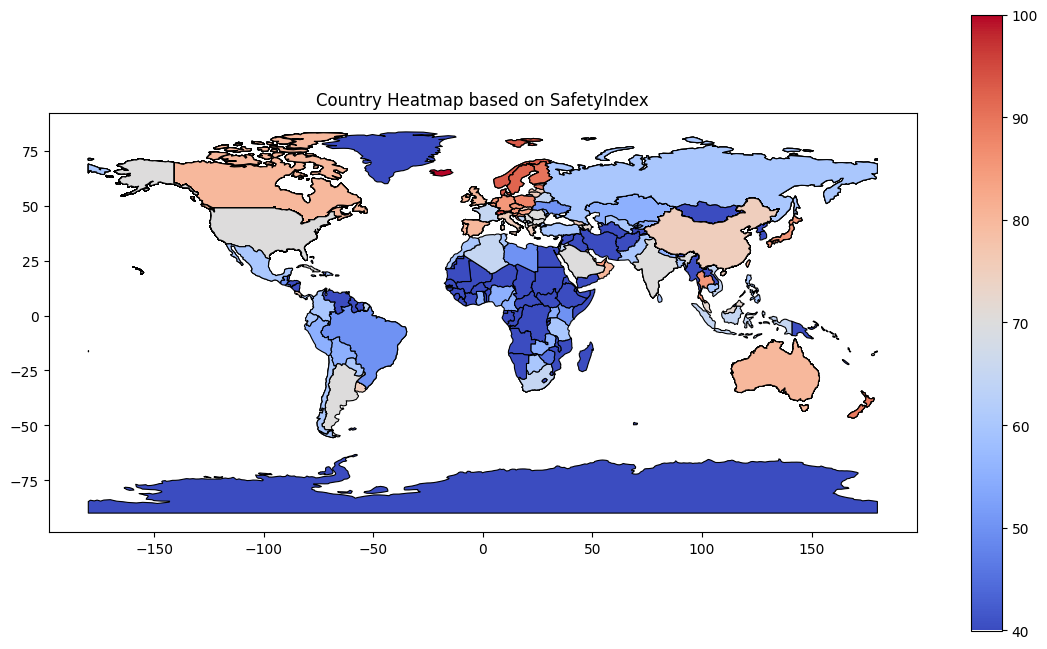

In [4]:
world = gpd.read_file("../110m_cultural/ne_110m_admin_0_countries.shp")
world["NAME_SORT"] = world["NAME_SORT"].apply(standardizeCountryName)
world = world.merge(df, how="left", left_on="NAME_SORT", right_on="Country")

minValue = world["SafetyIndex"].min()
world["SafetyIndex"] = world["SafetyIndex"].fillna(minValue)
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
world.plot(column="SafetyIndex", cmap="coolwarm", linewidth=0.8, edgecolor='black', legend=True, ax=ax)
ax.set_title("Country Heatmap based on SafetyIndex")
plt.savefig("../plots/safetyIndexPlot.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

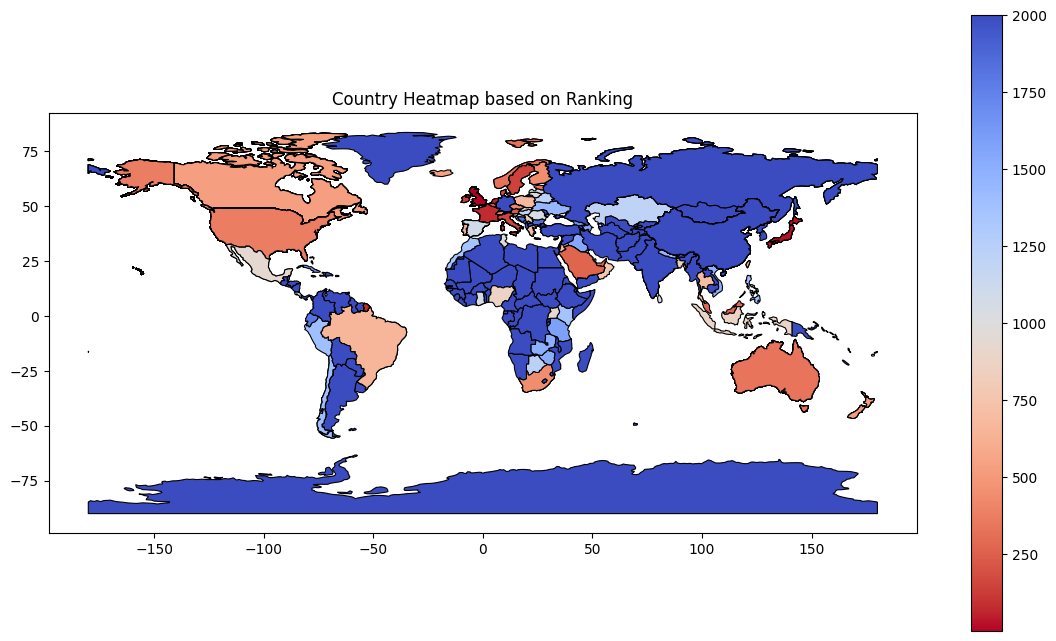

In [5]:
maxValue = world["Ranking"].max()
world["Ranking"] = world["Ranking"].fillna(maxValue)

fig, ax = plt.subplots(1, 1, figsize=(14, 8))
world.plot(column="Ranking", cmap="coolwarm_r", linewidth=0.8, edgecolor='black', legend=True, ax=ax)
ax.set_title("Country Heatmap based on Ranking")
plt.savefig("../plots/rankingPlot.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

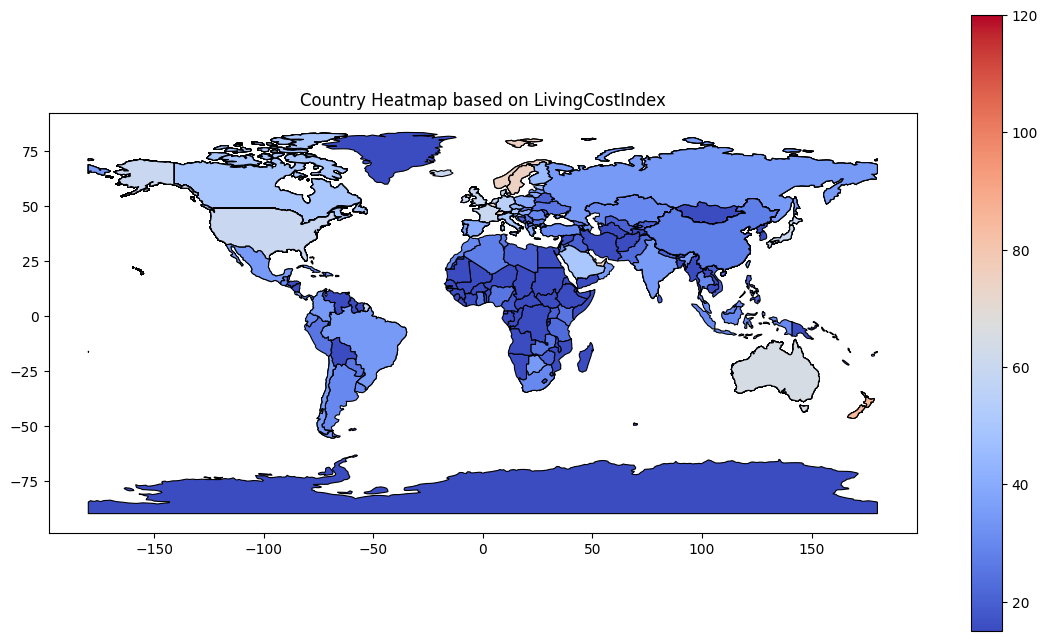

In [6]:
minValue = world["LivingCostIndex"].min()
world["LivingCostIndex"] = world["LivingCostIndex"].fillna(minValue)

fig, ax = plt.subplots(1, 1, figsize=(14, 8))
world.plot(column="LivingCostIndex", cmap="coolwarm", linewidth=0.8, edgecolor='black', legend=True, ax=ax)
ax.set_title("Country Heatmap based on LivingCostIndex")
plt.savefig("../plots/livingCostIndexPlot.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()